<a href="https://colab.research.google.com/github/LLewis/kaggle-deep-learning/blob/main/LLewis_StochasticGD_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train a neural network on Fuel Economy dataset, explore effects of the Learning Rate and batch size on SGD
- Task is to predict the fuel economy of an automobile given features like its type of engine, year made etc.
- reference: https://www.kaggle.com/code/latonyalewis/exercise-stochastic-gradient-descent/edit

In [7]:
#import libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


<ipython-input-7-7fe744740a0c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [11]:
#import more libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

#Read in fuel csv file
fuel = pd.read_csv("/content/sample_data/fuel.csv")
X = fuel.copy()
#Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) #log transforms target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))


Input shape: [50]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
#Take a look at the target case 'FE' column and remaining columns are features
fuel.head()

#take a look at the processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


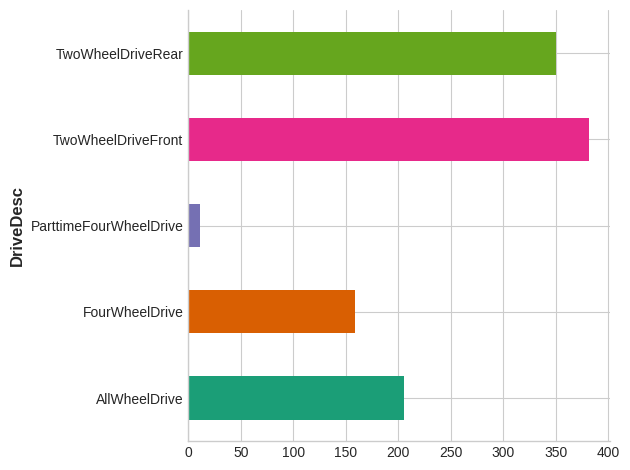

In [19]:
# @title DriveDesc - extra, I created from side graph options - really cool

from matplotlib import pyplot as plt
import seaborn as sns
fuel.groupby('DriveDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
# import libraries
from tensorflow import keras
from keras import layers

#Build architecture neural layers
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])
#print(model.weights)

In [26]:
# Add the loss and optimizer
#using the model's compile method, added the Adam optimizer and MAE loss

model.compile(
    optimizer="adam",
    loss="mae",
)